## Algoritmo de Bandido Multibraços

---

Esse algoritmo permitem testar **múltiplos tratamentos ao mesmo tempo e chegar a conclusões mais rápido** do que os projetos estatísticos tradicionais. Eles têm esse nome por causa das máquinas caça-níqueis usadas em apostas, chamados também de bandidos de um braço (já que são configuras de modo a extrair dinheiro do apostados em um fluxo constante). 

Se imaginássemos uma máquina caça-níqueis com mais de uma alavanca, cada alavanca premiando em um nível diferente, teríamos um bandido multibraços, que é o nome completo desse algoritmo. 

---

## Termos-chave

### Bandido multibraços

Uma máquina caça-níqueis imaginária com múltiplas alavancas para o cliente escolher, cada uma com diferentes prêmios, tomada aqui como uma analogia par um experimento de múltiplos tratamentos. É comumente utilizado em Sistemas de recomendação e Publicidade online  

### Braço

Um tratamento em um experimento (por exemplo, “título A em um teste web”)

### Ganho

O análogo experimental do ganho em uma máquina caça-níqueis (por exemplo, “cliques de clientes no link”)

---

_O algoritmo do bandido multibraços (multi-armed bandit) é um problema clássico de otimização e aprendizado por reforço, onde um agente deve tomar decisões repetidas vezes para maximizar a recompensa acumulada. O nome vem da analogia com máquinas caça-níqueis (slots ou "one-armed bandits"), em que cada alavanca (braço) oferece uma recompensa diferente e o objetivo é descobrir qual braço dá a maior recompensa ao longo do tempo._

Total de recompensas: 135
Recompensas por categoria: [11. 31. 93.]
Seleções por categoria: [160. 304. 536.]


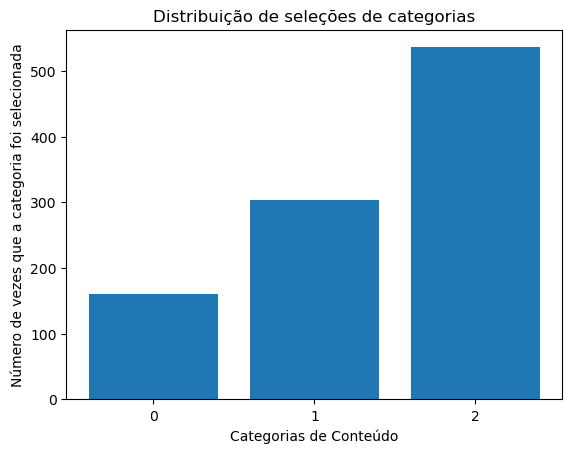

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo as probabilidades verdadeiras de aceitação de cada categoria de conteúdo
true_acceptance_rates = [0.05, 0.10, 0.15]  # Taxas de aceitação para 3 categorias
num_categories = len(true_acceptance_rates)  # Número de categorias
num_rounds = 1000  # Número de rodadas (decisões)
epsilon = 0.1  # Probabilidade de explorar (tentar nova categoria aleatoriamente)

# Inicializando recompensas acumuladas e contadores de escolhas para cada categoria
rewards = np.zeros(num_categories)
selections = np.zeros(num_categories)

# Função para simular se o usuário aceitou a recomendação (clique/consumo)
def simulate_user_reaction(category):
    return np.random.rand() < true_acceptance_rates[category]

# Sistema de recomendação usando Epsilon-Greedy
total_rewards = 0
category_selected = []

for n in range(num_rounds):
    if np.random.rand() < epsilon:
        # Explorar: Selecionar uma categoria aleatoriamente
        category = np.random.choice(num_categories)
    else:
        # Explorar: Selecionar a categoria com maior recompensa média conhecida
        category = np.argmax(rewards / (selections + 1e-10))  # Adicionamos uma pequena constante para evitar divisão por zero
    
    # Simular reação do usuário à categoria recomendada
    reward = simulate_user_reaction(category)
    
    # Atualizar contadores e recompensas
    selections[category] += 1
    rewards[category] += reward
    total_rewards += reward
    category_selected.append(category)

# Exibir resultados
print(f"Total de recompensas: {total_rewards}")
print(f"Recompensas por categoria: {rewards}")
print(f"Seleções por categoria: {selections}")

# Visualizar quantas vezes cada categoria foi selecionada
plt.hist(category_selected, bins=np.arange(num_categories + 1) - 0.5, rwidth=0.8)
plt.xticks(range(num_categories))
plt.xlabel("Categorias de Conteúdo")
plt.ylabel("Número de vezes que a categoria foi selecionada")
plt.title("Distribuição de seleções de categorias")
plt.show()


### Explicação:

1.  **Configuração inicial**:
    *   `true_acceptance_rates`: As taxas de aceitação reais (ou probabilidades de clique) para três categorias diferentes de conteúdo (por exemplo, artigos ou vídeos).
    *   `epsilon`: A taxa de exploração (10% das vezes, o algoritmo tenta uma categoria aleatória).
2.  **Algoritmo Epsilon-Greedy**:
    *   Com probabilidade `epsilon`, o algoritmo escolhe uma categoria aleatoriamente (exploração).
    *   Com probabilidade `1 - epsilon`, ele escolhe a categoria que tem a maior recompensa média observada até o momento (exploração).
3.  **Simulação da reação do usuário**:
    *   A função `simulate_user_reaction` gera uma resposta binária (clique ou não clique) com base nas probabilidades de aceitação reais das categorias.
4.  **Visualização**:
    *   O histograma mostra a distribuição de quantas vezes cada categoria foi recomendada ao longo das rodadas.

### Saída esperada:

Este código simula o comportamento de um sistema de recomendação e exibe o número total de recompensas (cliques/consumos) e quantas vezes cada categoria foi selecionada. A visualização ajuda a entender como o algoritmo equilibra exploração e exploração das diferentes categorias.